## Inner Products

In this chapter, we introduce the idea of an inner product, examine the additional structure that it imposes on  a vector space, and look at some common applications.  An inner product is an operation on two vectors in a vector space that is defined in such a way as to satisfy certain algebraic requirements.  To begin, we will focus only on one specific inner product defined for vectors in  $\mathbb{R}^n$.  Later in the chapter we will consider other examples of inner products in $\mathbb{R}^n$.

The **dot product** is the most common example of an inner product.  For vectors $U$ and $V$ in $\mathbb{R}^n$, the dot product is written as $U\cdot V$, and is defined in the following way.

$$
\begin{equation}
U\cdot V = \sum^n u_iv_i = u_1v_1 + u_2v_2 + ... + u_nv_n
\end{equation}
$$

For example, we show the computation for $U$ and $V$ in $\mathbb{R}^4$.


$$
\begin{equation}
U = \left[ \begin{array}{r} 2 \\ -1 \\ 2 \\ 3 \end{array}\right] \hspace{1cm} 
V = \left[ \begin{array}{r} 1 \\ 4 \\ 5 \\ 0  \end{array}\right] 
\end{equation}
$$


$$
\begin{equation}
U\cdot V = (2)(1) + (-1)(4) + (2)(5) + (3)(0) = 8
\end{equation}
$$



This is exactly the sort of calculation that is carried out in matrix multiplications.  In fact it is possible to view matrix products as collections of dot products between the rows and columns of the two matrices.  Suppose for example that we have the following matrix product with $U$ as the second row of $A$ and $V$ as the third column of $B$.

$$
\begin{equation}
A \left[ \begin{array}{rrrr} 1 & 1 & 0 & 2 \\ 2 & -1 & 2 & 3 \\ 3 & -1 & 2 & 1 \\ -2 & 0 & 0 & 1 \end{array}\right] \hspace{1cm} 
B = \left[ \begin{array}{rrr} 1 & 1 & 1 \\ 4 & 1 & 4 \\ 0 & 1 & 5 \\ 1 & 1 & 0 \end{array}\right] 
\hspace{1cm}
AB =  \left[ \begin{array}{rrrr} 7 & 4 & 5 \\ 1 & 6 & 8 \\ 0 & 5 & 9 \\ -1 & -1 & -2 \end{array}\right] 
\end{equation}
$$

We see that $(AB)_{23} = U\cdot V$, the dot product of the second row of $A$ with the third row of $B$.  In general the entry $(AB)_{ij}$ will be the dot product of the $i$th row of $A$ with the $j$th column of $B$.  

Taking advantage of this connection, we could also write the definition of the dot product by viewing the vectors as $n\times 1$ matrices, and making use of matrix transposes.

$$
\begin{equation}
U\cdot V = U^TV
\end{equation}
$$

Since $U$ is an $n\times 1$ matrix, $U^T$ will be a $1\times n$ matrix, and $U^TV$ will be a $1\times 1$ matrix.  In other words $U^TV$ will be a scalar.  If we take this view, we will be able to compute inner products just the same as we would matrix products using NumPy.


In [1]:
import numpy as np

U = np.array([[2],[-1],[2],[3]])
V = np.array([[1],[4],[5],[0]])

dot_product = U.transpose()@V
print(dot_product)

[[8]]


Computing a dot product with this formula is correct and we would not notice any difference in doing the calculation on paper.  There is however a slight technical inconvenience in using NumPy operations to apply this formula.  The output produced by the code ($\texttt{dot_product}$) is not a true scalar, but in fact is another NumPy array object of size $1 \times 1$.  This may have unintended consequences as we include this code in larger calculations.  We can keep this in mind and simply reference the value in the $1\times 1$ array with indices if need be.      

In [2]:
print(dot_product[0,0])

8


Another possibility is that we write our own function, called $\texttt{DotProduct}$ to provide us the dot product in a simple format.  The following code is included in the $\texttt{laguide}$ module for future use. 

In [3]:
def DotProduct(U,V):
    # =============================================================================
    # U and V are NumPy arrays that represents vectors of dimension n x 1.
    # DotProduct returns the dot product of U and V
    # =============================================================================

    # Check shapes of U and V
    if (U.shape[1] != 1 or V.shape[1] != 1):
        print("Dot product only accepts column vectors.")
        return
    # Check shape of V
    if (U.shape[0] != V.shape[0]):
        print("Dot product only accepts column vectors of equal length.")
        return

    n = U.shape[0]
    product = 0
    
    for i in range(n):
        product += U[i,0]*V[i,0]

    return product

We can now call the function and receive a scalar as output.

In [4]:
print(DotProduct(U,V))

8


### Geometric Interpretations

The dot product provides a way to measure distances and angles in $\mathbb{R}^n$.  Again it is easiest to visualize these measures in $\mathbb{R}^2$.

The **magnitude** of a vector $U$, written as $||U||$, is defined as $\left(U\cdot U\right)^{1/2}$.  In $\mathbb{R}^2$ it is plain to see that this definition corresponds to the Pythagorean Theorem.



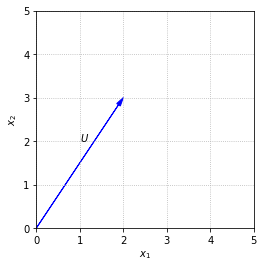

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,2,3,fc='b',ec='b',**options)

ax.text(1,2,'$U$')

ax.set_xlim(0,5)
ax.set_xlabel('$x_1$')
ax.set_ylim(0,5)
ax.set_ylabel('$x_2$')
ax.set_aspect('equal')
ax.grid(True,ls=':')

$$
\begin{equation}
U = \left[ \begin{array}{r} 2 \\ 3 \end{array}\right] \hspace{2cm} 
||U|| = \sqrt{(2)(2) + (3)(3)} = \sqrt{13}
\end{equation}
$$

Calculating the magnitude of a vector is common enough that it will be useful to write a function to carry it out.  We will leave it as an exercise in this section, and will incude the function $\texttt{Magnitude}$ in the $\texttt{laguide}$ module for use in future sections. 

In [3]:
from laguide import Magnitude

U = np.array([[2],[3]])
print(Magnitude(U))

3.605551275463989


It is often useful to work with vectors that have magnitude equal to one.  Such vectors are called **unit vectors**.  We can construct a unit vector in the *same direction* as a vector $U$ by multiplying $U$ by the recipricol of its magnitude.  We will label this unit vector $W$.

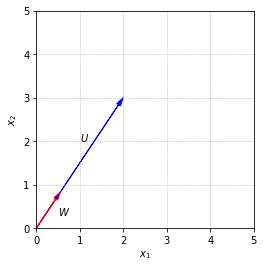

In [4]:
fig, ax = plt.subplots()
options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,2,3,fc='b',ec='b',**options)
ax.arrow(0,0,0.555,0.832,fc='b',ec='r',**options)

ax.text(1,2,'$U$')
ax.text(0.5,0.3,'$W$')


ax.set_xlim(0,5)
ax.set_xlabel('$x_1$')
ax.set_ylim(0,5)
ax.set_ylabel('$x_2$')
ax.set_aspect('equal')
ax.grid(True,ls=':')

$$
\begin{equation}
W = \frac{1}{\sqrt{13}} \left[ \begin{array}{r} 2 \\ 3 \end{array}\right]
\end{equation}
$$

We can also use the definition of magnitude to define the distance between two vectors $U$ and $V$ as $||U-V||$, the magnitude of the difference.  If we picture the vectors as arrows, $U-V$ goes from the tip of $V$ to the tip of $U$.  This is consistent with our arrow picture of vector addition since $V + (U-V) = U$.   

In [1]:
fig, ax = plt.subplots()
options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,2,3,fc='b',ec='b',**options)
ax.arrow(0,0,4,2,fc='b',ec='b',**options)
ax.arrow(4,2,-2,1,fc='b',ec='r',**options)

ax.text(1,2,'$U$')
ax.text(3,1,'$V$')
ax.text(3,2.8,'$U-V$')

ax.set_xlim(0,5)
ax.set_xlabel('$x_1$')
ax.set_ylim(0,5)
ax.set_ylabel('$x_2$')
ax.set_aspect('equal')
ax.grid(True,ls=':')

NameError: name 'plt' is not defined

With common identities from trigonometry, it is also possible to work out the angle between two vectors in terms of the dot product.

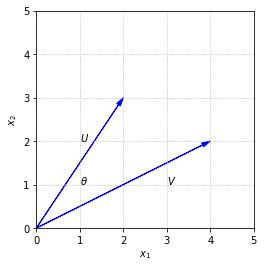

In [10]:
fig, ax = plt.subplots()
options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,2,3,fc='b',ec='b',**options)
ax.arrow(0,0,4,2,fc='b',ec='b',**options)

ax.text(1,2,'$U$')
ax.text(3,1,'$V$')
ax.text(1,1,'$\\theta$')

ax.set_xlim(0,5)
ax.set_xlabel('$x_1$')
ax.set_ylim(0,5)
ax.set_ylabel('$x_2$')
ax.set_aspect('equal')
ax.grid(True,ls=':')

$$
\begin{equation}
\cos{\theta} = \frac{U\cdot V}{||U||||V||}
\end{equation}
$$

It is worth noting the special case that arises when the angle between $U$ and $V$ is a right angle.  In this case, since $\cos{\theta}$ will be zero, the dot product $U\cdot V$ will also be zero.  When $U\cdot V = 0$, the vectors $U$ and $V$  are said to be **orthogonal**.  In upcoming sections we will learn the importance of orthogonality, and how it can be used to simplify certain calculations 

### Algebraic Properties

If $U$, $V$, and $W$ are any vectors in $\mathbb{R}^n$, and $k$ is a scalar, then the following statements involving the dot product are true.

1. $U\cdot V = V\cdot U$
2. $U\cdot(V + W) = U\cdot V + U\cdot W$
3. $(kU)\cdot V = k(U\cdot V)$
4. $U\cdot U \ge 0$

These algebraic properties are not difficult to prove using the definition of the dot product, but they are important for carrying out calculations with unspecified vectors.  More importantly, it is these four properties that make the dot product an **inner product**.

### Exercises

- Create a function named $\texttt{Magnitude}$ that accepts as an argument vector in the form of a Numpy array object with shape $n\times 1$, and returns the magnitude of that vector.

- Use the $\texttt{random}$ module of Numpy to generate random $4\times 1$ vectors $U$, $V$, and $W$, and a random scalar $k$.  Verify the algebraic properties of the dot product listed above.  Try to make use of a conditional statement to check each statement.

- Let $X$ and $Y$ be the following vectors.

$$
\begin{equation}
X = \left[ \begin{array}{r} 3 \\ -1 \\ 2  \end{array}\right] \hspace{1cm} 
Y = \left[ \begin{array}{r} 4 \\ 2 \\ 0  \end{array}\right] 
\end{equation}
$$

- Determine the angle between $X$ and $Y$.  (*You will need the $\texttt{acos}$ function in Python's $\texttt{math}$ module.*)
- Find a vector in $\mathbb{R}^3$ that is orthogonal to the vector $X$.
- Construct a unit vector $Z$ such that $Z\cdot Y = -||Y||$.